<a href="https://colab.research.google.com/github/anuva05/PracticalDeepLearningCourse/blob/master/Lesson2_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In this section, let us explore Stochastic Gradient Descent (SGD), an optimization method used commonly in neural networks. 

Linear Regression

The goal of a linear regression problem is to fit a line to a given set of points.

In [2]:
n=100
x = torch.ones(n,2)
#generate input using uniform distribution
x[:,0].uniform_(-1.,1)
#display some values
x[:5]

tensor([[ 0.2213,  1.0000],
        [-0.6393,  1.0000],
        [-0.8667,  1.0000],
        [ 0.2223,  1.0000],
        [ 0.2681,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
#create data
y = x@a + torch.rand(n)

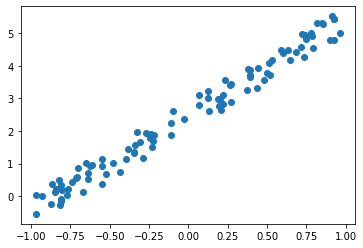

In [6]:
plt.scatter(x[:,0], y);

You want to find parameters (weights) a such that you minimize the error between the points and the line x@a. Note that here a is unknown. For a regression problem the most common error function or loss function is the mean squared error.

In [0]:
def mse(y_hat, y): 
  return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(7.7778)

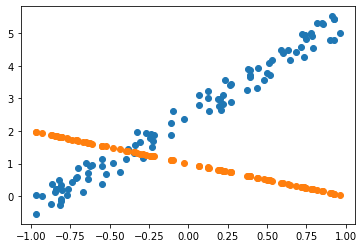

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression - this is where SGD comes in.

# Stochastic Gradient Descent

We would like to find the values of a that minimize mse_loss.

Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in PyTorch.

In [28]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [30]:
lr = 1e-1
for t in range(100): update()

tensor(7.7778, grad_fn=<MeanBackward0>)
tensor(1.3621, grad_fn=<MeanBackward0>)
tensor(0.3519, grad_fn=<MeanBackward0>)
tensor(0.1327, grad_fn=<MeanBackward0>)
tensor(0.0842, grad_fn=<MeanBackward0>)
tensor(0.0734, grad_fn=<MeanBackward0>)
tensor(0.0711, grad_fn=<MeanBackward0>)
tensor(0.0705, grad_fn=<MeanBackward0>)
tensor(0.0704, grad_fn=<MeanBackward0>)
tensor(0.0704, grad_fn=<MeanBackward0>)


In [31]:
#Print the parameter 'a' after optimization 
a

Parameter containing:
tensor([2.9308, 2.5140], requires_grad=True)

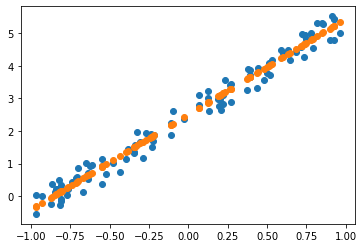

In [32]:
plt.scatter(x[:,0],y)
#to enable plotting, temporarily exclude a from computation graph
a.requires_grad=False
plt.scatter(x[:,0],x@a);


The fitted line now represents our data quite well.